This Notebook is to analyze on a macro point of view COVID-19 data to enhance my pandas/EDA/Analysis skills.
On this specific dataset we can't go in details too much, since we don't have data related to decisions taken by any governments/states/regions, we're unable to go too much in details.

For example:
- Some continent/contry decided to put on quarantine, some more restricting quarantines and other less restrictive ones.
- Vaccination campaign
- etc...

Since COVID-19 pandemic is hard to analyze on a micro state with so little data, for these reasons I won't go into much details but will focus on analysing on macro.

In [1]:
%time
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [20, 8]
plt.rcParams['figure.dpi'] = 100

pd.options.display.max_rows = 200

CPU times: total: 0 ns
Wall time: 0 ns


In [2]:
file = 'dataset/owid-covid-data.csv'
df = pd.read_csv(file)

In [4]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323661 entries, 0 to 323660
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    323661 non-null  object 
 1   continent                                   308301 non-null  object 
 2   location                                    323661 non-null  object 
 3   date                                        323661 non-null  object 
 4   total_cases                                 286549 non-null  float64
 5   new_cases                                   314782 non-null  float64
 6   new_cases_smoothed                          313523 non-null  float64
 7   total_deaths                                265511 non-null  float64
 8   new_deaths                                  314824 non-null  float64
 9   new_deaths_smoothed                         313594 non-null  float64
 

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


Starting to check number of check death/new case per continent

In [5]:
# print('______________________NULL______________________')
# print(df.isnull().sum())
# print('______________________NAN______________________')
# print(df.isna().sum())
# print('______________________MAX______________________')
# print(df.max())
# print('______________________MIN______________________')
# print(df.min())
# print('______________________MEAN______________________')
# print(df.mean())
# print('______________________MEDIAN______________________')
# print(df.median())

______________________NULL______________________
iso_code                                           0
continent                                      15360
location                                           0
date                                               0
total_cases                                    37112
new_cases                                       8879
new_cases_smoothed                             10138
total_deaths                                   58150
new_deaths                                      8837
new_deaths_smoothed                            10067
total_cases_per_million                        37112
new_cases_per_million                           8879
new_cases_smoothed_per_million                 10138
total_deaths_per_million                       58150
new_deaths_per_million                          8837
new_deaths_smoothed_per_million                10067
reproduction_rate                             138844
icu_patients                                  2868

C:\Users\Shadow\AppData\Local\Temp\ipykernel_7936\1058221734.py:6: FutureWarning: The default value of numeric_only in DataFrame.max is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.max())


iso_code                                                ZWE
location                                           Zimbabwe
date                                             2023-07-05
total_cases                                     767726097.0
new_cases                                         8401732.0
new_cases_smoothed                              6402720.429
total_deaths                                      6948751.0
new_deaths                                          27941.0
new_deaths_smoothed                               14824.143
total_cases_per_million                          737554.506
new_cases_per_million                            228872.025
new_cases_smoothed_per_million                    37241.781
total_deaths_per_million                           6491.797
new_deaths_per_million                              603.656
new_deaths_smoothed_per_million                     148.641
reproduction_rate                                      5.87
icu_patients                            

C:\Users\Shadow\AppData\Local\Temp\ipykernel_7936\1058221734.py:8: FutureWarning: The default value of numeric_only in DataFrame.min is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.min())


iso_code                                              ABW
location                                      Afghanistan
date                                           2020-01-01
total_cases                                           1.0
new_cases                                             0.0
new_cases_smoothed                                    0.0
total_deaths                                          1.0
new_deaths                                            0.0
new_deaths_smoothed                                   0.0
total_cases_per_million                               0.0
new_cases_per_million                                 0.0
new_cases_smoothed_per_million                        0.0
total_deaths_per_million                              0.0
new_deaths_per_million                                0.0
new_deaths_smoothed_per_million                       0.0
reproduction_rate                                   -0.07
icu_patients                                          0.0
icu_patients_p

As seen quickly from above cell:

    - There's NAN values on the continent columns
    - There's few negatives values
        - Reproduction rate: correspond to loss of fertility on the specific location.
        - Excess mortality: This mean that fewer deaths occurred in a particular month compared with the baseline period. - So That's good news and does look like good numbers.


Continent's NAN Check:

In [3]:
# NAN on continent columns
nan_continent = df[df['continent'].isna()]
print(nan_continent['iso_code'].unique())
print(nan_continent['location'].unique())

['OWID_AFR' 'OWID_ASI' 'OWID_EUR' 'OWID_EUN' 'OWID_HIC' 'OWID_LIC'
 'OWID_LMC' 'OWID_NAM' 'OWID_OCE' 'OWID_SAM' 'OWID_UMC' 'OWID_WRL']
['Africa' 'Asia' 'Europe' 'European Union' 'High income' 'Low income'
 'Lower middle income' 'North America' 'Oceania' 'South America'
 'Upper middle income' 'World']


NAN in continent correspond to iso_code of OWID_xxx where xxx are a sum of every location in the continent, so.

There's also some location that I don't know what that is, like "Low income".
For better clarity for the rest of the notebook I'll drop related rows, but keeping in mind that can be useful to get real continent-based info like population instead of location-based (As seen on the below cell).

In [ ]:
# print(df[df['continent'] == 'Asia']['population'].max())
# print(nan_continent[nan_continent['iso_code'] == 'OWID_ASI']['population'].max())

1425887360.0
4721383370.0


In [4]:
df_wona = pd.concat([df, nan_continent, nan_continent]).drop_duplicates(keep=False) # Dropping content related to NAN continents

Considering the other values are legit (And would require too many time of checking each values by hand) we will start analysing data and if any problem are encountered, I'll display it.

Among things we might wanna check:
- Evolution of situation (new cases and deaths alongside hospitalization/vaccinations/boosters/etc...)
    - Make it per continent and location
- Compare distribution of total/max/min numbers betweens continents
    Compare per year
- Check evolution with comparison on human "features" (age, smoking) and country based (poverty, handwashing facilities, population)


Evolution of the situation:

In [ ]:
# Relevant values to check for  checking evolution of the situation with enough data
values= [
    'new_cases_smoothed_per_million', 
    'new_deaths_smoothed_per_million', 
    'new_vaccinations_smoothed', 
    'hosp_patients_per_million', 
    'new_people_vaccinated_smoothed_per_hundred', 
    'excess_mortality_cumulative',
    'people_fully_vaccinated_per_hundred',
    'tests_per_case',
    'total_boosters_per_hundred'
]

array([[<AxesSubplot: xlabel='date'>, <AxesSubplot: xlabel='date'>,
        <AxesSubplot: xlabel='date'>, <AxesSubplot: xlabel='date'>,
        <AxesSubplot: xlabel='date'>, <AxesSubplot: xlabel='date'>],
       [<AxesSubplot: xlabel='date'>, <AxesSubplot: xlabel='date'>,
        <AxesSubplot: xlabel='date'>, <AxesSubplot: xlabel='date'>,
        <AxesSubplot: xlabel='date'>, <AxesSubplot: xlabel='date'>],
       [<AxesSubplot: xlabel='date'>, <AxesSubplot: xlabel='date'>,
        <AxesSubplot: xlabel='date'>, <AxesSubplot: xlabel='date'>,
        <AxesSubplot: xlabel='date'>, <AxesSubplot: xlabel='date'>],
       [<AxesSubplot: xlabel='date'>, <AxesSubplot: xlabel='date'>,
        <AxesSubplot: xlabel='date'>, <AxesSubplot: xlabel='date'>,
        <AxesSubplot: xlabel='date'>, <AxesSubplot: xlabel='date'>],
       [<AxesSubplot: xlabel='date'>, <AxesSubplot: xlabel='date'>,
        <AxesSubplot: xlabel='date'>, <AxesSubplot: xlabel='date'>,
        <AxesSubplot: xlabel='date'>, <AxesS

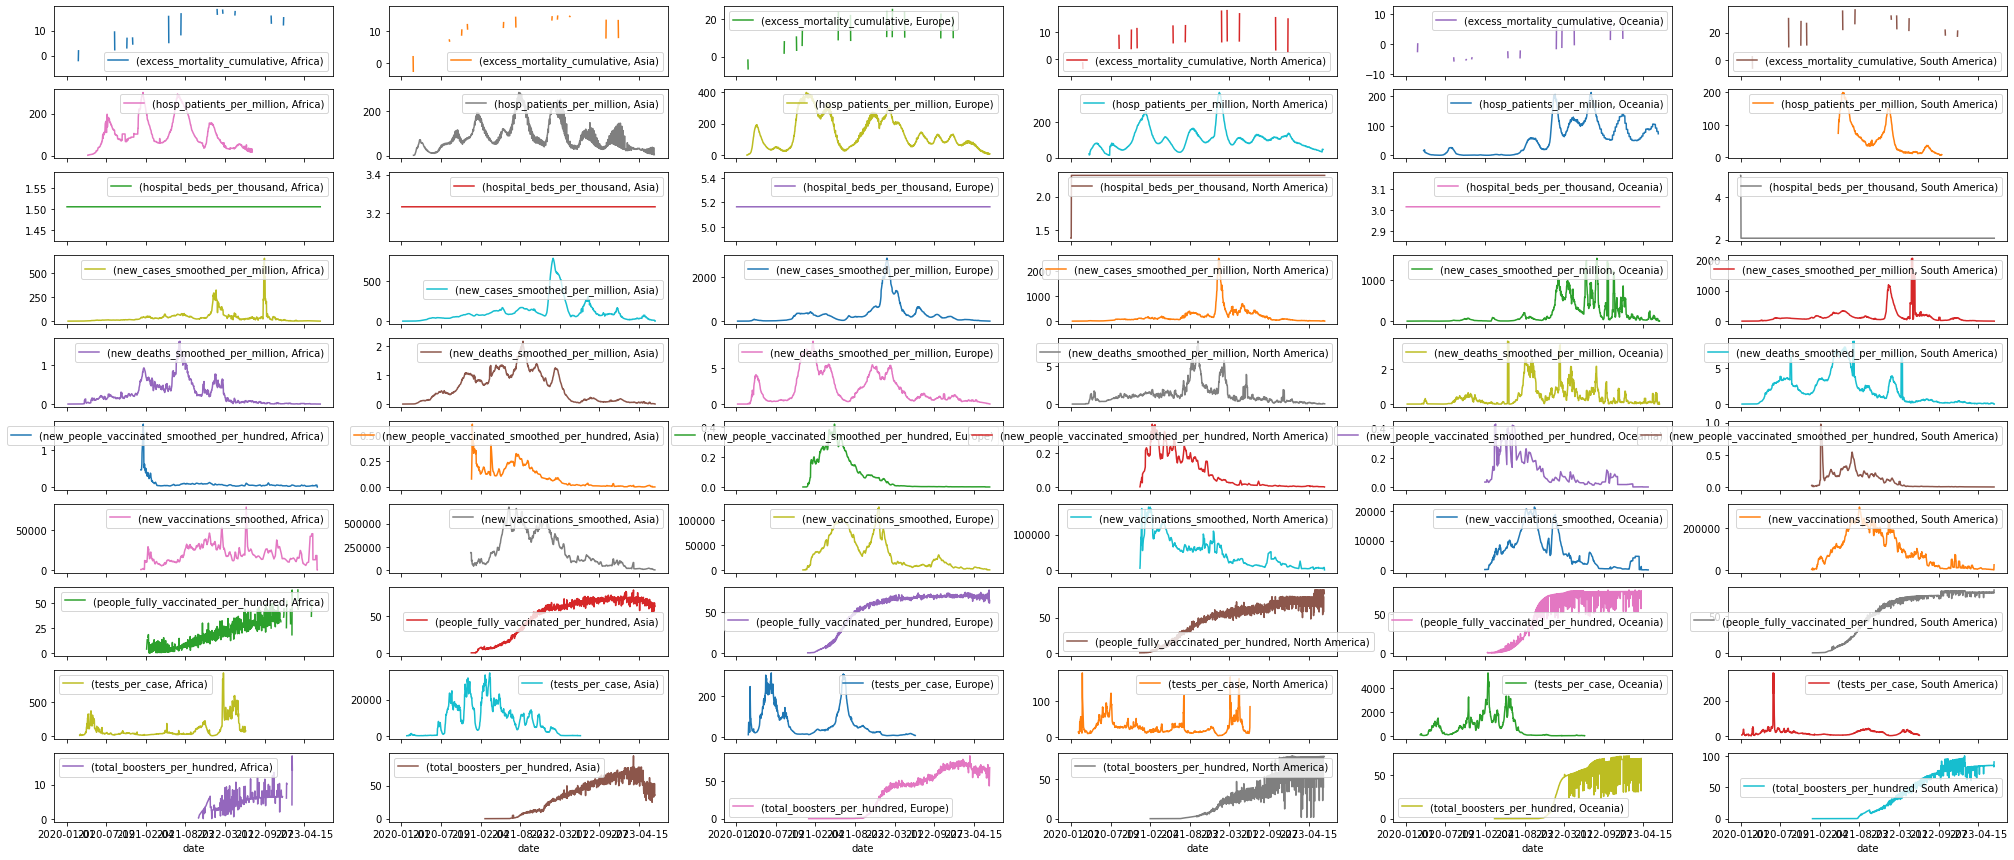

In [ ]:
# Checking the direct evolution o macro state
temp = df_wona.pivot_table(index='date', columns='continent', values=values)
temp.plot(subplots=True, layout=(len(values),6), figsize=(35, 15))
# temp

By taking a quick glance at all plots, we can see difference between continent on handling the pandemic. 

Seeing 3 distinctive "waves" in europe where other continents have either a number and intensity of waves higher than 3 (like Asia) or with North America that have only 2 big waves and more much smaller occurences.  
In addition we can speculate on the 

array([[<AxesSubplot: xlabel='date'>, <AxesSubplot: xlabel='date'>,
        <AxesSubplot: xlabel='date'>],
       [<AxesSubplot: xlabel='date'>, <AxesSubplot: xlabel='date'>,
        <AxesSubplot: xlabel='date'>],
       [<AxesSubplot: xlabel='date'>, <AxesSubplot: xlabel='date'>,
        <AxesSubplot: xlabel='date'>]], dtype=object)

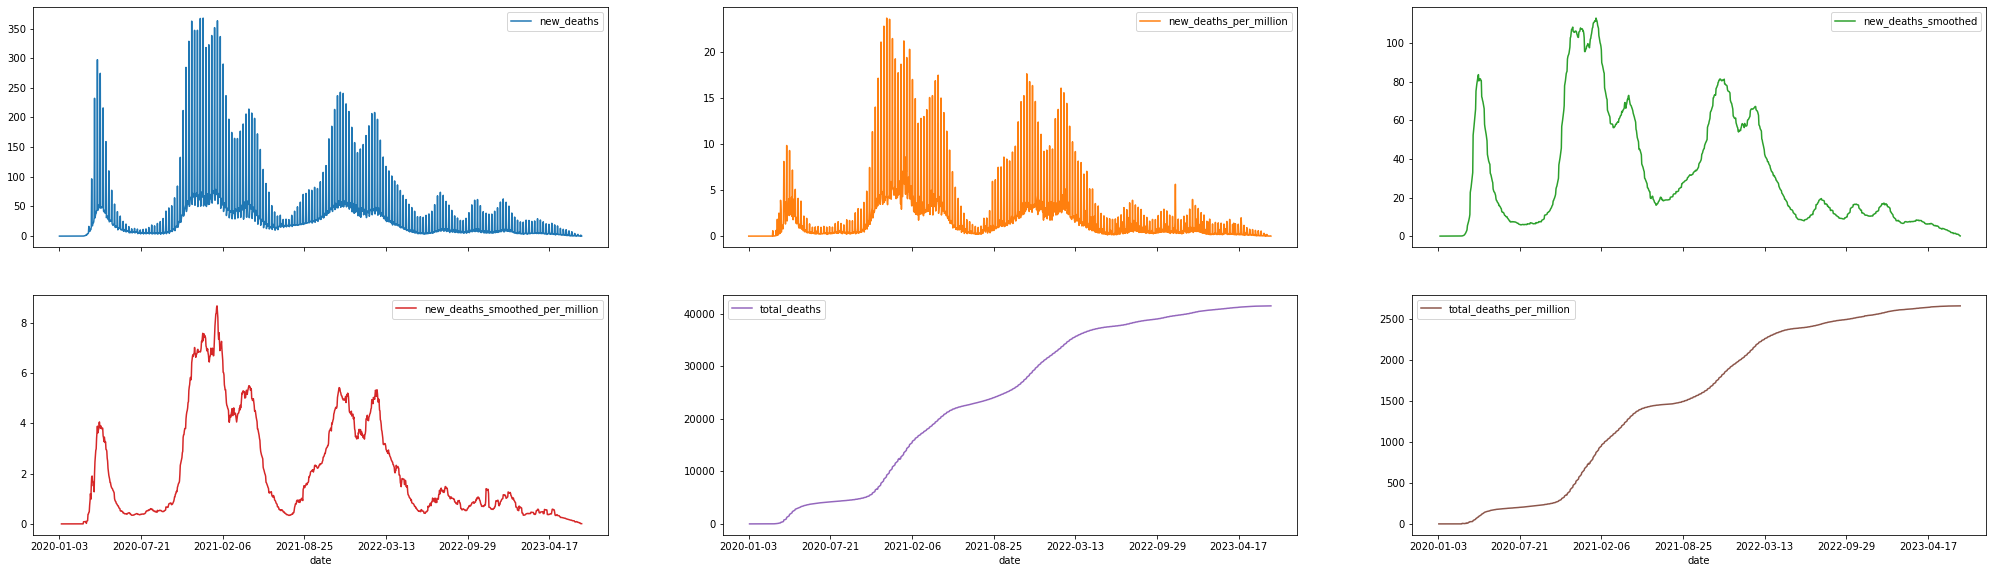

In [ ]:
# Compare differents time series columns to display differences
col = [
    'total_deaths',
    'new_deaths',
    'new_deaths_smoothed', 
    'total_deaths_per_million',
    'new_deaths_per_million',
    'new_deaths_smoothed_per_million'
]
cont = 'Europe'
t = df_wona[df_wona['continent'] == cont].pivot_table(index='date', values=col)
t.plot(figsize=(35, 15), subplots=True, layout=(3,3))

C:\Users\Shadow\AppData\Local\Temp\ipykernel_12524\1017252381.py:3: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  tmax = df_wona.groupby('location').max(numeric_only=False)


<AxesSubplot: xlabel='total_deaths', ylabel='total_cases'>

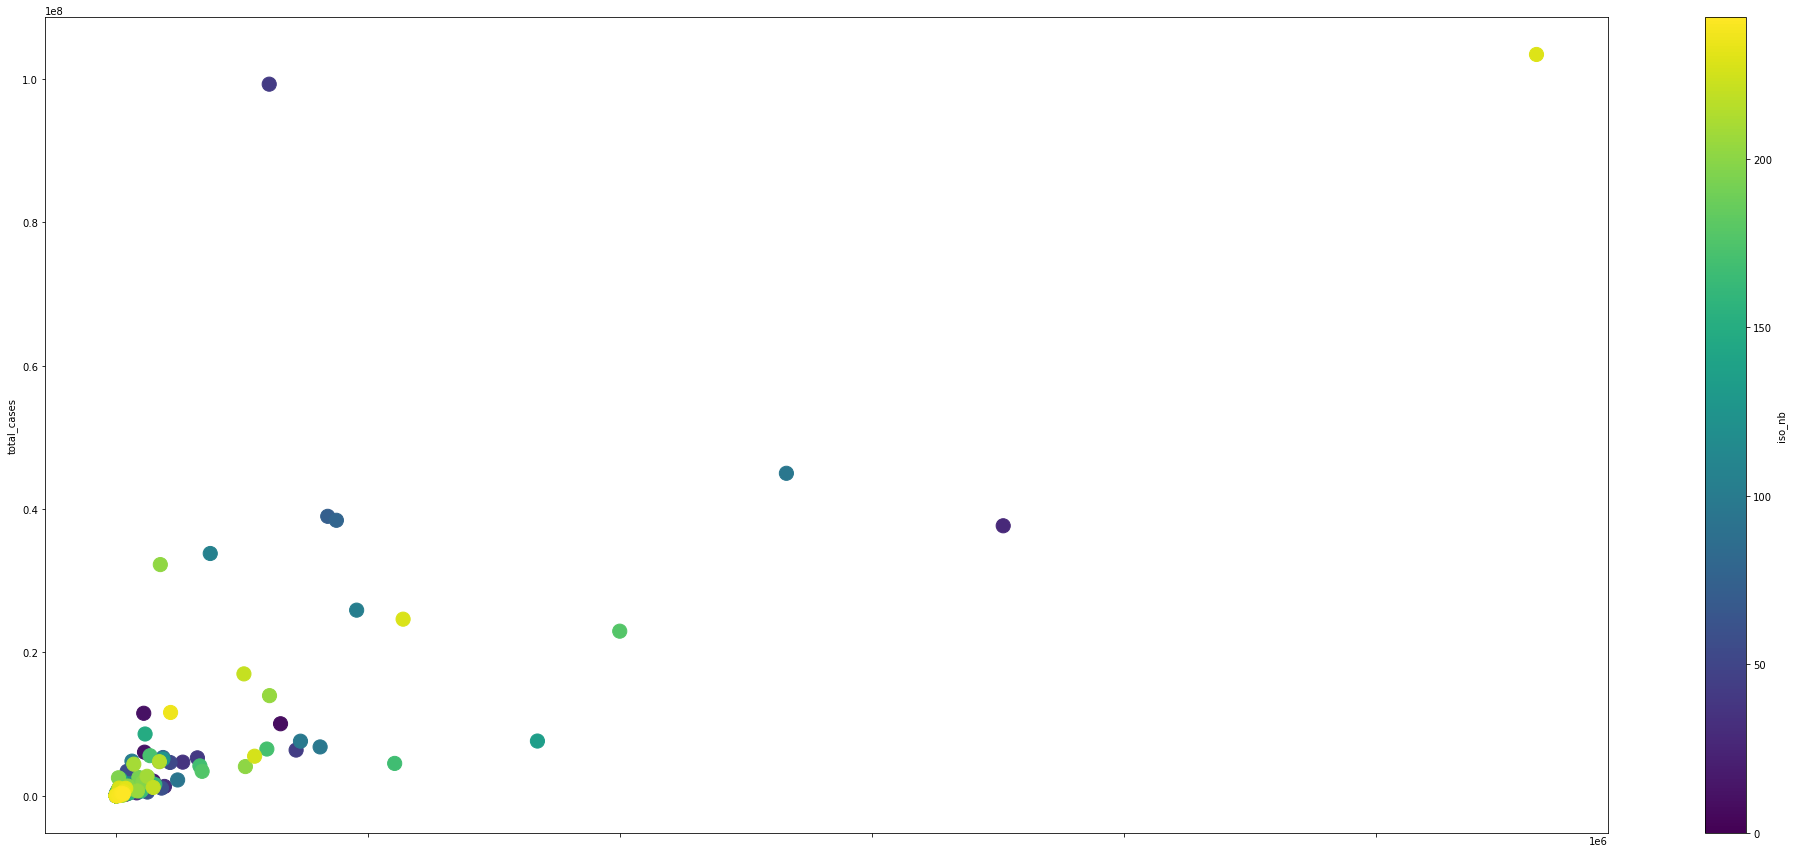

In [10]:
# Check max/mean/median deaths/cases per location per continent (single dot)
val = ['total_deaths_per_million', 'total_cases_per_million']
tmax = df_wona.groupby('location').max(numeric_only=False)
tmean = df_wona.groupby('location').mean(numeric_only=True)
tmedian = df_wona.groupby('location').median(numeric_only=True)
tmax = tmax.reset_index()
# tmax['cont_nb'] = [i for i in range(len(tmax['continent'].unique()))]
tmax['iso_nb'] = [i for i in range(len(tmax['location'].unique()))]
tmax.plot.scatter(x='total_deaths', y='total_cases', c='iso_nb',colormap='viridis', s=200, figsize=(35,15))



array([[<AxesSubplot: xlabel='date'>, <AxesSubplot: xlabel='date'>,
        <AxesSubplot: xlabel='date'>, <AxesSubplot: xlabel='date'>,
        <AxesSubplot: xlabel='date'>, <AxesSubplot: xlabel='date'>],
       [<AxesSubplot: xlabel='date'>, <AxesSubplot: xlabel='date'>,
        <AxesSubplot: xlabel='date'>, <AxesSubplot: xlabel='date'>,
        <AxesSubplot: xlabel='date'>, <AxesSubplot: xlabel='date'>],
       [<AxesSubplot: xlabel='date'>, <AxesSubplot: xlabel='date'>,
        <AxesSubplot: xlabel='date'>, <AxesSubplot: xlabel='date'>,
        <AxesSubplot: xlabel='date'>, <AxesSubplot: xlabel='date'>],
       [<AxesSubplot: xlabel='date'>, <AxesSubplot: xlabel='date'>,
        <AxesSubplot: xlabel='date'>, <AxesSubplot: xlabel='date'>,
        <AxesSubplot: xlabel='date'>, <AxesSubplot: xlabel='date'>],
       [<AxesSubplot: xlabel='date'>, <AxesSubplot: xlabel='date'>,
        <AxesSubplot: xlabel='date'>, <AxesSubplot: xlabel='date'>,
        <AxesSubplot: xlabel='date'>, <AxesS

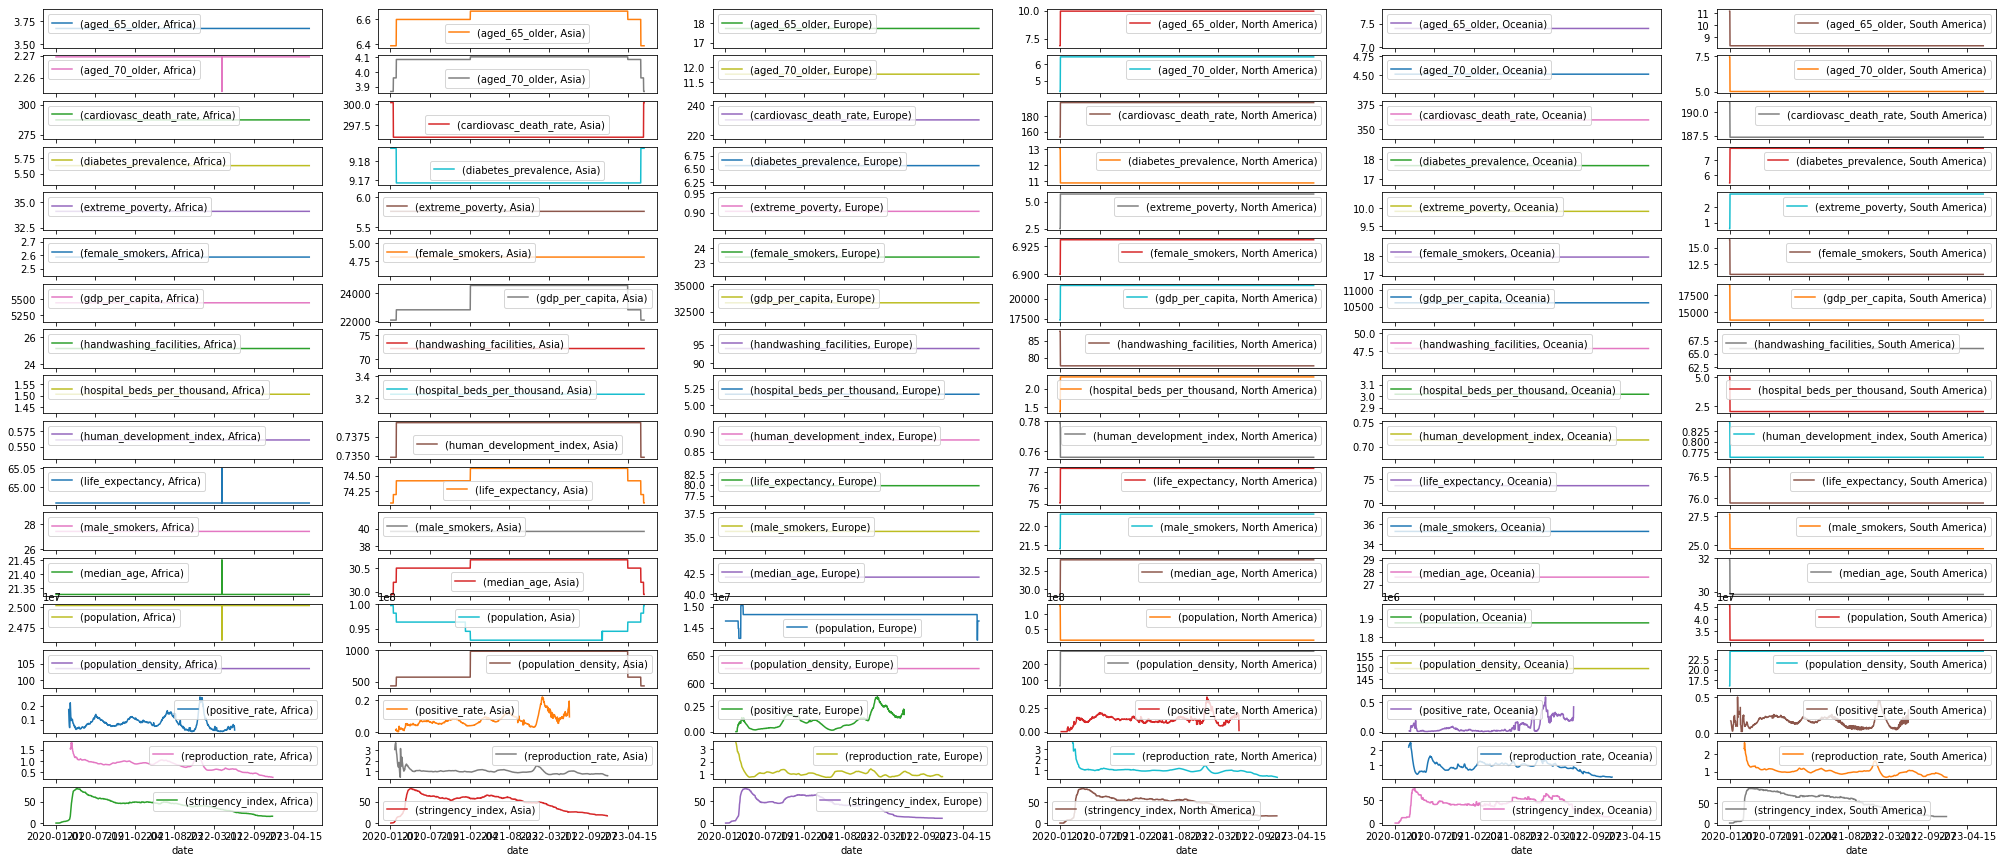

In [ ]:
# We want to observe the differents evolution of others data (continent/human) for future check and relevant 
col = ['reproduction_rate','positive_rate','stringency_index','population_density', 'median_age', 
      'aged_65_older', 'aged_70_older', 'gdp_per_capita', 'extreme_poverty', 'cardiovasc_death_rate', 
      'diabetes_prevalence','female_smokers', 'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand',
      'life_expectancy', 'human_development_index', 'population']

c = ['reproduction_rate','positive_rate','stringency_index','population_density', 'median_age', 
      'aged_65_older', 'aged_70_older']

temp = df_wona.pivot_table(index='date', columns='continent', values=col)
temp.plot(figsize=(35, 15), subplots=True, layout=(len(col),6))

It's not really relevant (and might be wrong following the rest of the notebook), but we can observe that even though the pandemic evolution, there's wrong or not updated data for most continents with Oceania having the exact same number for each values staying the same.

We can also observe:
- Africa and S/N America seems to have few spikes that look like either wrong data entry or country data much lower than other of the continent
- Asia always have start and go (even on opposite) values and seems a bit weird
    - Median age & older peoples are raising even, we don't have age of peoples who died on the timestamp so we can't really check.
- Positive rate's data ended earlier

array([[<AxesSubplot: xlabel='date'>, <AxesSubplot: xlabel='date'>,
        <AxesSubplot: xlabel='date'>],
       [<AxesSubplot: xlabel='date'>, <AxesSubplot: xlabel='date'>,
        <AxesSubplot: xlabel='date'>],
       [<AxesSubplot: xlabel='date'>, <AxesSubplot: xlabel='date'>,
        <AxesSubplot: xlabel='date'>],
       [<AxesSubplot: xlabel='date'>, <AxesSubplot: xlabel='date'>,
        <AxesSubplot: xlabel='date'>]], dtype=object)

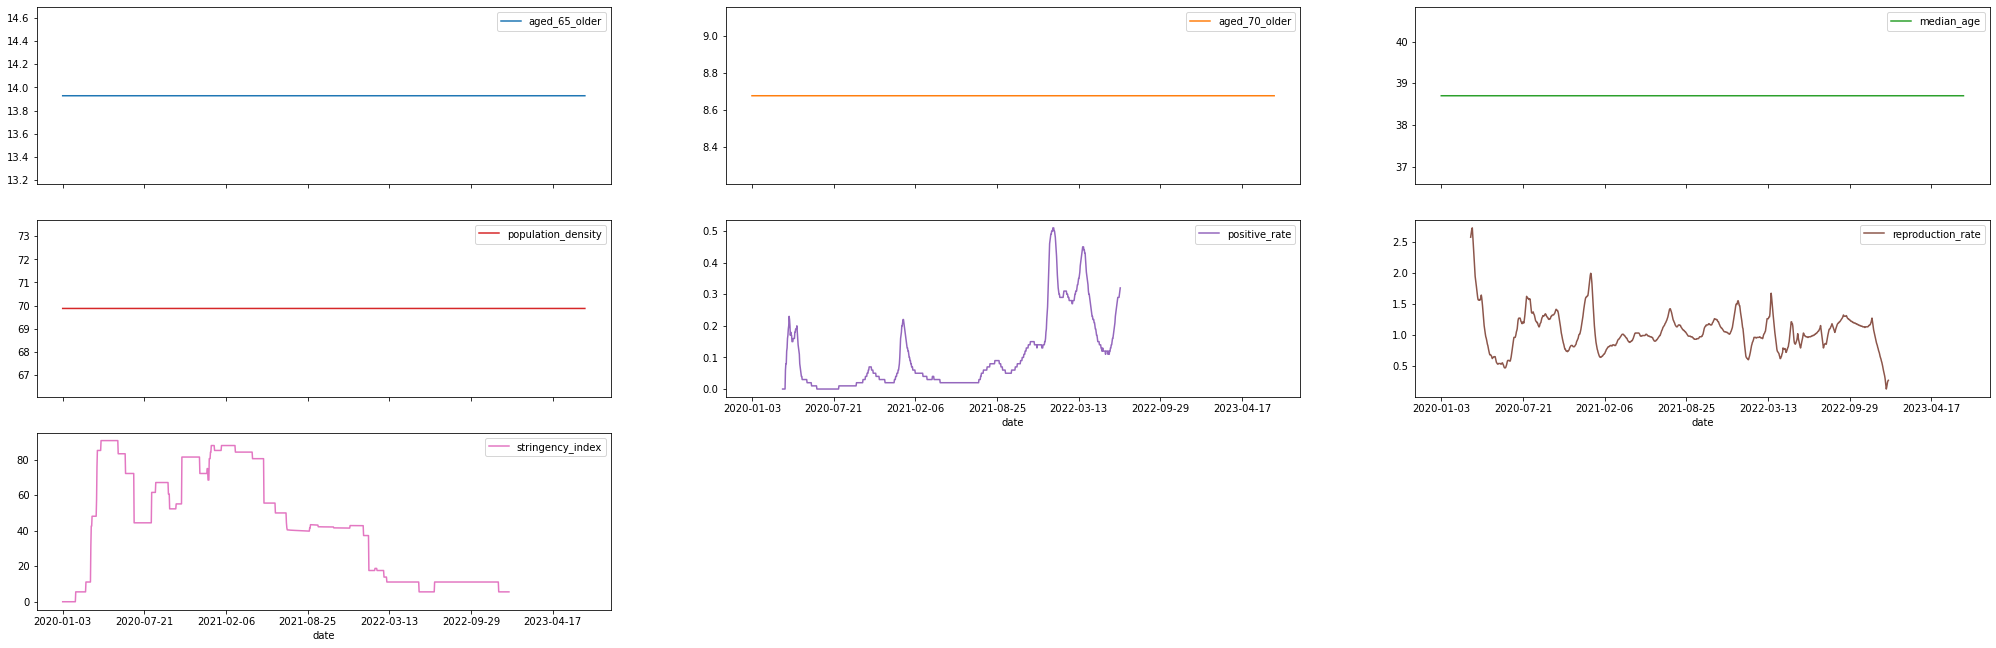

In [ ]:
# Checking on a state only 
temp = df_wona[df_wona['location'] == 'Ireland'].pivot_table(index='date', values=c)
temp.plot(subplots=True, layout=(4,3), figsize=(35, 15))

In [ ]:
# Checking the nb of occurence that a continent got higher number of colums-based data based on the mean and median

<AxesSubplot: ylabel='location'>

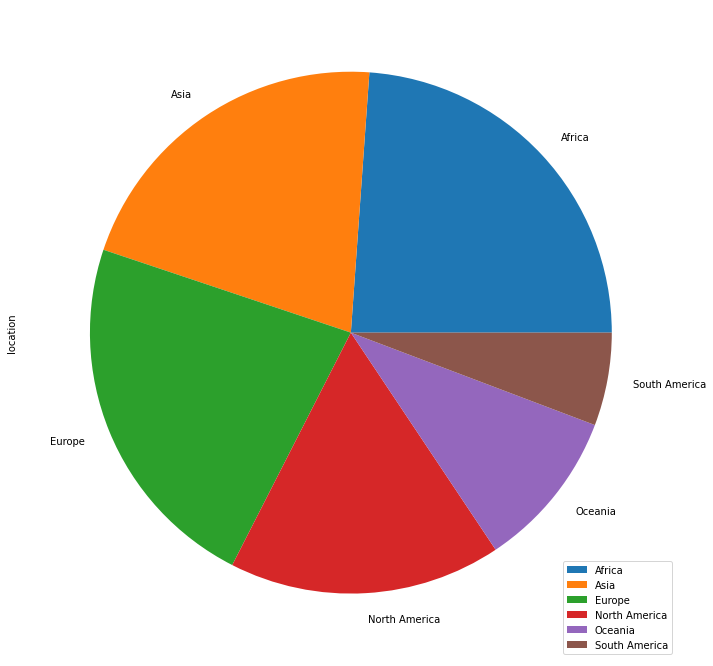

In [30]:
# Check repartition of number of country per continent 
temp = df_wona[['continent', 'location']].groupby('continent').nunique()
# temp = temp.reset_index()
temp.plot.pie(y='location', figsize=(12,12))

In [ ]:
# Spotting higher values of differents relevants columns to spot really high values using both 

toCheck = [i for i in df.columns]
tc = ['reproduction_rate','positive_rate','stringency_index','population_density', 'median_age', 
      'aged_65_older', 'aged_70_older', 'gdp_per_capita', 'extreme_poverty', 'cardiovasc_death_rate', 
      'diabetes_prevalence','female_smokers', 'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand',
      'life_expectancy', 'human_development_index', 'population']

print(toCheck)
for i in tc:
    print('{} - {}'.format(i, len(df[i].unique())))
    

['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths', 'new_deaths_smoothed', 'total_cases_per_million', 'new_cases_per_million', 'new_cases_smoothed_per_million', 'total_deaths_per_million', 'new_deaths_per_million', 'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients', 'icu_patients_per_million', 'hosp_patients', 'hosp_patients_per_million', 'weekly_icu_admissions', 'weekly_icu_admissions_per_million', 'weekly_hosp_admissions', 'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests', 'total_tests_per_thousand', 'new_tests_per_thousand', 'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'total_boosters', 'new_vaccinations', 'new_vaccinations_smoothed', 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred', 'total_